# US Flight Delay Analysis - Winter Season (2018-2019)
This notebook contains the analysis of the "On-Time : Reporting Carrier On-Time Performance" dataset, for: December 2018, January 2019 and February 2019.

The analysis of the data set will focus on the study of the Air Traffic Delays related to the Air Traffic Congestion.

In terms of technology, we will use pandas for the data manipulation and analysis.

Each phase of the process followed is indicated by cronological order.

### Imports:

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import os

#Visualitzation
import matplotlib.pyplot as plt
import seaborn as sbn

# 01. Data Loading

In [2]:
#Winter Season dataset
df = pd.read_csv('C:\\Users\\GerardEspejo\\Desktop\\TFM\\Data\\Winter_Season.csv')
df.sample(5)

Unnamed: 0  Year  Quarter  Month  DayOfMonth  DayOfWeek  FlightDate  \
1226480     1226480  2019        1      2          17          7  2019-02-17   
1704269     1704269  2019        1      2          23          6  2019-02-23   
140982       140982  2018        4     12           7          5  2018-12-07   
850559       850559  2019        1      1          18          5  2019-01-18   
846091       846091  2019        1      1          16          3  2019-01-16   

        UniqueCarrier Carrier RegistrationNum         ...           \
1226480            WN      WN          N762SW         ...            
1704269            UA      UA          N39415         ...            
140982             WN      WN          N464WN         ...            
850559             OO      OO          N816SK         ...            
846091             OO      OO          N774SK         ...            

         CRSElapsedTimeMin  ActualElapsedTimeMin  FlightTimeMin  \
1226480              150.0                 138.0          125.0   
1704269              171.0                 203.0          154.0   
140982               105.0                   NaN            NaN   
850559                81.0                  87.0           52.0   
846091                81.0                  76.0           43.0   

        NumberOfFlights DistanceMil Distance_Int250Mil DepTime2  ArrTime2  \
1226480             1.0       971.0                  4    13:23     15:41   
1704269             1.0      1120.0                  5    18:47     23:10   
140982              1.0       569.0                  3      NaN       NaN   
850559              1.0       311.0                  2    14:29     16:56   
846091              1.0       237.0                  1    06:50     09:06   

                 DepDateTime          ArrDateTime  
1226480  2019-02-17 13:23:00  2019-02-17 15:41:00  
1704269  2019-02-23 18:47:00  2019-02-23 23:10:00  
140982                   NaN                  NaN  
850559   2019-01-18 14:29:00  2019-01-18 16:56:00  
846091   2019-01-16 06:50:00  2019-01-16 09:06:00  

[5 rows x 49 columns]

# 02. Data Analysis

In [3]:
df.shape

(1711002, 49)

In [4]:
df.columns

Index(['Unnamed: 0', 'Year', 'Quarter', 'Month', 'DayOfMonth', 'DayOfWeek',
       'FlightDate', 'UniqueCarrier', 'Carrier', 'RegistrationNum',
       'FlightNum', 'OriginAirport_IDNum', 'OriginCityMarket_IDNum',
       'Origin_IATA', 'OriginCityName', 'OriginState_ID', 'OriginStateName',
       'OriginWAC', 'DestAirport_IDNum', 'DestCityMarket_IDNum', 'Dest_IATA',
       'DestCityName', 'DestState_ID', 'DestStateName', 'DestWAC',
       'CRSDepTime', 'DepTime', 'DepDelayMin', 'DepDelayMin0',
       'DepDelay_Ind15', 'DepDelayGroup_Int15', 'CRSArrTime', 'ArrTime',
       'ArrDelayMin', 'ArrDelayMin0', 'ArrDelay_Ind15', 'ArrDelayGroup_Int15',
       'Cancelled', 'Diverted', 'CRSElapsedTimeMin', 'ActualElapsedTimeMin',
       'FlightTimeMin', 'NumberOfFlights', 'DistanceMil', 'Distance_Int250Mil',
       'DepTime2', 'ArrTime2', 'DepDateTime', 'ArrDateTime'],
      dtype='object')

### Air Traffic Congestion Study - Regions / Airports

##### Top 20 States per volume of flights

In [5]:
group_by_state = df.groupby('OriginStateName')

In [6]:
#Top 20 States per volume of flights
group_by_state['OriginStateName'].count().sort_values(ascending=False).head(20)

OriginStateName
California        190120
Texas             183671
Florida           146907
Illinois          101367
Georgia            96275
New York           91996
North Carolina     78706
Virginia           63528
Colorado           63198
Arizona            50398
Michigan           44993
Pennsylvania       42797
Nevada             42629
Minnesota          37631
Washington         34200
Massachusetts      33857
New Jersey         33199
Missouri           31514
Tennessee          30369
Utah               28622
Name: OriginStateName, dtype: int64

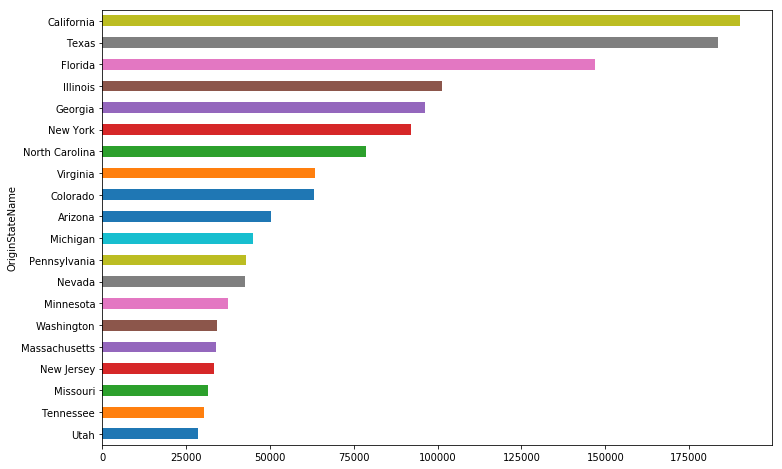

In [7]:
group_by_state['OriginStateName'].count().sort_values(ascending=True).tail(20).plot(kind='barh', figsize=(12,8))

##### Top 20 Cities per volume of flights

In [8]:
group_by_city = df.groupby(['OriginCityName', 'OriginStateName'])

In [9]:
#Top 20 cities per volume of flights
group_by_city['OriginCityName'].count().sort_values(ascending=False).head(20)

OriginCityName         OriginStateName
Chicago, IL            Illinois           96861
Atlanta, GA            Georgia            90778
New York, NY           New York           71144
Dallas/Fort Worth, TX  Texas              67089
Houston, TX            Texas              57330
Charlotte, NC          North Carolina     55326
Denver, CO             Colorado           54214
Los Angeles, CA        California         52634
Washington, DC         Virginia           49691
Phoenix, AZ            Arizona            44499
San Francisco, CA      California         40249
Las Vegas, NV          Nevada             37896
Detroit, MI            Michigan           35720
Minneapolis, MN        Minnesota          35519
Orlando, FL            Florida            35373
Boston, MA             Massachusetts      33587
Newark, NJ             New Jersey         31748
Seattle, WA            Washington         30331
Philadelphia, PA       Pennsylvania       27143
Salt Lake City, UT     Utah               27110
N

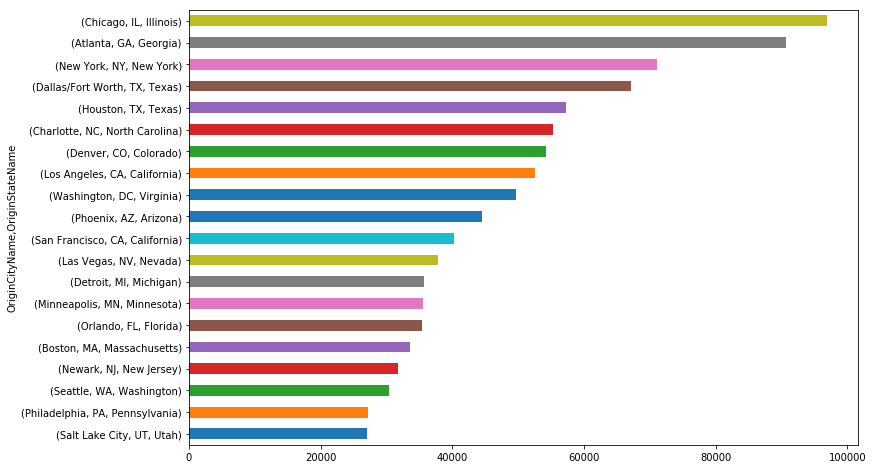

In [10]:
group_by_city['OriginCityName'].count().sort_values(ascending=True).tail(20).plot(kind='barh', figsize=(12,8))

##### Top 20 airports per volume of flights

In [11]:
group_by_airport = df.groupby(['Origin_IATA', 'OriginCityName', 'OriginStateName'])

In [12]:
#How many airports are contemplated in the dataset?
group_by_airport['Origin_IATA'].unique().count()

346

In [13]:
#Top 20 airports per volume of flights
group_by_airport['Origin_IATA'].count().sort_values(ascending=False).head(20)

Origin_IATA  OriginCityName         OriginStateName
ATL          Atlanta, GA            Georgia            90778
ORD          Chicago, IL            Illinois           77774
DFW          Dallas/Fort Worth, TX  Texas              67089
CLT          Charlotte, NC          North Carolina     55326
DEN          Denver, CO             Colorado           54214
LAX          Los Angeles, CA        California         52634
PHX          Phoenix, AZ            Arizona            43083
IAH          Houston, TX            Texas              42845
SFO          San Francisco, CA      California         40249
LGA          New York, NY           New York           40223
LAS          Las Vegas, NV          Nevada             37896
DTW          Detroit, MI            Michigan           35720
MSP          Minneapolis, MN        Minnesota          35519
MCO          Orlando, FL            Florida            35373
DCA          Washington, DC         Virginia           33942
BOS          Boston, MA          

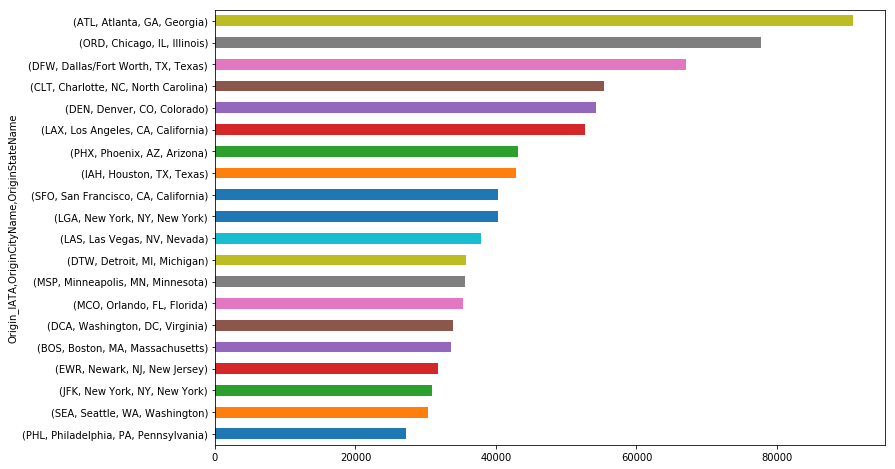

In [54]:
group_by_airport['Origin_IATA'].count().sort_values(ascending=True).tail(20).plot(kind='barh', figsize=(12,8))

### Air Traffic Delay Study - Airports

In [112]:
df['delayed'] = df['ArrDelayMin'].apply(lambda x: x > 0)

##### Top 20 airports per volume of flights delayed

In [113]:
delayed = df[df['delayed']==True]

In [114]:
group_by_delayed_airport = delayed.groupby(['Origin_IATA', 'OriginCityName', 'OriginStateName'])

In [151]:
group_by_delayed_airport['Origin_IATA'].count().sort_values(ascending=False).head(20)

Origin_IATA  OriginCityName         OriginStateName
ORD          Chicago, IL            Illinois           34628
ATL          Atlanta, GA            Georgia            28847
DFW          Dallas/Fort Worth, TX  Texas              27905
CLT          Charlotte, NC          North Carolina     20690
DEN          Denver, CO             Colorado           19915
LAX          Los Angeles, CA        California         17710
SFO          San Francisco, CA      California         16834
IAH          Houston, TX            Texas              15639
LGA          New York, NY           New York           15365
PHX          Phoenix, AZ            Arizona            15192
LAS          Las Vegas, NV          Nevada             13772
EWR          Newark, NJ             New Jersey         13028
MCO          Orlando, FL            Florida            12744
DCA          Washington, DC         Virginia           11682
BOS          Boston, MA             Massachusetts      11653
MSP          Minneapolis, MN     

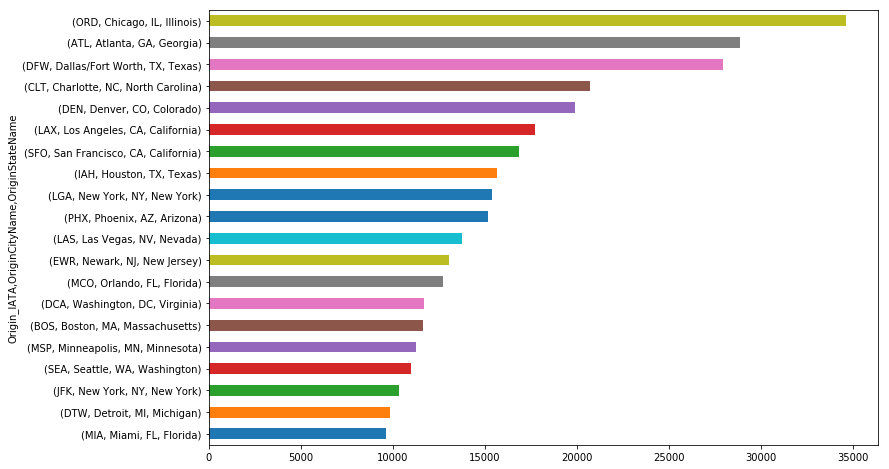

In [116]:
group_by_delayed_airport['Origin_IATA'].count().sort_values(ascending=True).tail(20).plot(kind='barh', figsize=(12,8))

##### Percentage of flights delayed by airport

In [189]:
group_by_delayed_airport2 = df.groupby(['Origin_IATA','delayed']).size().unstack()
group_by_delayed_airport2.head()

delayed      False  True 
Origin_IATA              
ABE            685    370
ABI            263    235
ABQ           3512   1713
ABR            115     65
ABY            179     63

In [190]:
group_by_delayed_airport2['total_flights'] = (group_by_delayed_airport2[True] + group_by_delayed_airport2[False])
group_by_delayed_airport2.head()

delayed      False  True  total_flights
Origin_IATA                            
ABE            685   370           1055
ABI            263   235            498
ABQ           3512  1713           5225
ABR            115    65            180
ABY            179    63            242

In [125]:
group_by_delayed_airport2['proportion_delayed_flights'] = (group_by_delayed_airport2[True]/group_by_delayed_airport2['total_flights'])
group_by_delayed_airport2.head()

delayed      False  True  total_flights  proportion_delayed_flights
Origin_IATA                                                        
ABE            685   370           1055                    0.350711
ABI            263   235            498                    0.471888
ABQ           3512  1713           5225                    0.327847
ABR            115    65            180                    0.361111
ABY            179    63            242                    0.260331

In [126]:
group_by_delayed_airport2['percentage'] = (group_by_delayed_airport2['proportion_delayed_flights'])*100
group_by_delayed_airport2.head()

delayed      False  True  total_flights  proportion_delayed_flights  \
Origin_IATA                                                           
ABE            685   370           1055                    0.350711   
ABI            263   235            498                    0.471888   
ABQ           3512  1713           5225                    0.327847   
ABR            115    65            180                    0.361111   
ABY            179    63            242                    0.260331   

delayed      percentage  
Origin_IATA              
ABE           35.071090  
ABI           47.188755  
ABQ           32.784689  
ABR           36.111111  
ABY           26.033058

In [181]:
group_by_delayed_airport2.sort_values(by='percentage', ascending=False).head(40)

delayed      False   True  total_flights  proportion_delayed_flights  \
Origin_IATA                                                            
OGD              6     19             25                    0.760000   
HGR              8     22             30                    0.733333   
OWB             10     17             27                    0.629630   
SCK             67     92            159                    0.578616   
CYS             40     50             90                    0.555556   
LCK             63     69            132                    0.522727   
MEI            134    136            270                    0.503704   
IAG             90     91            181                    0.502762   
EGE            610    598           1208                    0.495033   
MFR            561    522           1083                    0.481994   
ASE           1282   1191           2473                    0.481601   
OGS             21     19             40                    0.475000   
ALO             87     78            165                    0.472727   
ABI            263    235            498                    0.471888   
PPG             17     15             32                    0.468750   
LAW            162    142            304                    0.467105   
HHH            139    121            260                    0.465385   
ACV            212    182            394                    0.461929   
JAC            629    521           1150                    0.453043   
LNK            205    169            374                    0.451872   
SGF           1055    867           1922                    0.451093   
FAR            717    587           1304                    0.450153   
MDW          10511   8576          19087                    0.449311   
MMH            129    105            234                    0.448718   
CDC             85     69            154                    0.448052   
LAR             84     68            152                    0.447368   
STC             31     25             56                    0.446429   
ORD          43146  34628          77774                    0.445239   
RFD             82     65            147                    0.442177   
RST            488    383            871                    0.439724   
HTS             58     44            102                    0.431373   
GGG            107     81            188                    0.430851   
SMX             28     21             49                    0.428571   
SUX            196    145            341                    0.425220   
PVU             84     62            146                    0.424658   
MIA          13210   9622          22832                    0.421426   
CMX            104     75            179                    0.418994   
SFO          23415  16834          40249                    0.418246   
AZA            825    591           1416                    0.417373   
DRO            405    289            694                    0.416427   

delayed      percentage  
Origin_IATA              
OGD           76.000000  
HGR           73.333333  
OWB           62.962963  
SCK           57.861635  
CYS           55.555556  
LCK           52.272727  
MEI           50.370370  
IAG           50.276243  
EGE           49.503311  
MFR           48.199446  
ASE           48.160129  
OGS           47.500000  
ALO           47.272727  
ABI           47.188755  
PPG           46.875000  
LAW           46.710526  
HHH           46.538462  
ACV           46.192893  
JAC           45.304348  
LNK           45.187166  
SGF           45.109261  
FAR           45.015337  
MDW           44.931105  
MMH           44.871795  
CDC           44.805195  
LAR           44.736842  
STC           44.642857  
ORD           44.523877  
RFD           44.217687  
RST           43.972445  
HTS           43.137255  
GGG           43.085106  
SMX           42.857143  
SUX           42.521994  
PVU           42.465753  
MIA          

##### Top 20 airports per volume of flights delayed, flight delayed percentages

In [154]:
group_by_delayed_airport3 = delayed.groupby(['Origin_IATA'])
top20_volume_flights = group_by_delayed_airport3['Origin_IATA'].count().sort_values(ascending=False).head(20)
top20_volume_flights

Origin_IATA
ORD    34628
ATL    28847
DFW    27905
CLT    20690
DEN    19915
LAX    17710
SFO    16834
IAH    15639
LGA    15365
PHX    15192
LAS    13772
EWR    13028
MCO    12744
DCA    11682
BOS    11653
MSP    11247
SEA    11003
JFK    10327
DTW     9834
MIA     9622
Name: Origin_IATA, dtype: int64

In [157]:
top20_volume_flights_list = top20_volume_flights.index.tolist()

In [145]:
h = group_by_delayed_airport2.isin(voldelayed_top)

In [87]:
group_by_airport2 = delayed.groupby(['Origin_IATA', 'OriginCityName', 'OriginStateName'])

In [ ]:
group_by_airport2[]

In [89]:
airports_delay = group_by_airport2['ArrDelayMin'].agg(['sum', 'mean', 'count'])
airports_delay.sample(5)

sum       mean  count
Origin_IATA OriginCityName         OriginStateName                            
CWA         Mosinee, WI            Wisconsin          9048.0  48.127660    188
PHX         Phoenix, AZ            Arizona          452823.0  29.806675  15192
BMI         Bloomington/Normal, IL Illinois          19885.0  79.223108    251
SAT         San Antonio, TX        Texas             88425.0  31.670845   2792
ITO         Hilo, HI               Hawaii             6476.0  13.837607    468

In [90]:
airports_delay.sort_values(by='sum', ascending=False).head(10)

sum       mean  count
Origin_IATA OriginCityName        OriginStateName                             
ORD         Chicago, IL           Illinois         1550559.0  44.777608  34628
DFW         Dallas/Fort Worth, TX Texas             922413.0  33.055474  27905
ATL         Atlanta, GA           Georgia           908308.0  31.487087  28847
SFO         San Francisco, CA     California        774131.0  45.986159  16834
LGA         New York, NY          New York          712941.0  46.400325  15365
DEN         Denver, CO            Colorado          704566.0  35.378659  19915
LAX         Los Angeles, CA       California        644033.0  36.365500  17710
CLT         Charlotte, NC         North Carolina    587106.0  28.376317  20690
BOS         Boston, MA            Massachusetts     586228.0  50.307045  11653
IAH         Houston, TX           Texas             583210.0  37.292026  15639

In [91]:
airports_delay.sort_values(by='mean', ascending=False).head(10)

sum        mean  \
Origin_IATA OriginCityName            OriginStateName                        
JMS         Jamestown, ND             North Dakota     14847.0  170.655172   
DVL         Devils Lake, ND           North Dakota      6543.0  145.400000   
IMT         Iron Mountain/Kingsfd, MI Michigan          6111.0  142.116279   
PLN         Pellston, MI              Michigan          8725.0  134.230769   
APN         Alpena, MI                Michigan          6057.0  128.872340   
ITH         Ithaca/Cortland, NY       New York          7550.0  127.966102   
OTH         North Bend/Coos Bay, OR   Oregon            3803.0  115.242424   
BJI         Bemidji, MN               Minnesota         5258.0  114.304348   
LWB         Lewisburg, WV             West Virginia     6282.0  114.218182   
CIU         Sault Ste. Marie, MI      Michigan          4844.0  110.090909   

                                                       count  
Origin_IATA OriginCityName            OriginStateName         
JMS         Jamestown, ND             North Dakota        87  
DVL         Devils Lake, ND           North Dakota        45  
IMT         Iron Mountain/Kingsfd, MI Michigan            43  
PLN         Pellston, MI              Michigan            65  
APN         Alpena, MI                Michigan            47  
ITH         Ithaca/Cortland, NY       New York            59  
OTH         North Bend/Coos Bay, OR   Oregon              33  
BJI         Bemidji, MN               Minnesota           46  
LWB         Lewisburg, WV             West Virginia       55  
CIU         Sault Ste. Marie, MI      Michigan            44

In [21]:
top_20_airports = df['Origin_IATA'].value_counts().head(20)

In [26]:
top_20_airports_names = top_20_airports.index.tolist()
top_20_airports_names

['ATL',
 'ORD',
 'DFW',
 'CLT',
 'DEN',
 'LAX',
 'PHX',
 'IAH',
 'SFO',
 'LGA',
 'LAS',
 'DTW',
 'MSP',
 'MCO',
 'DCA',
 'BOS',
 'EWR',
 'JFK',
 'SEA',
 'PHL']

In [27]:
top_volume_airports =  df[df['Origin_IATA'].isin(top_20_airports_names)]
top_volume_airports.sample(5)

Unnamed: 0  Year  Quarter  Month  DayOfMonth  DayOfWeek  FlightDate  \
113813       113813  2018        4     12          14          5  2018-12-14   
455914       455914  2018        4     12          11          2  2018-12-11   
1608189     1608189  2019        1      2           4          1  2019-02-04   
1360652     1360652  2019        1      2           1          5  2019-02-01   
1591110     1591110  2019        1      2          24          7  2019-02-24   

        UniqueCarrier Carrier RegistrationNum         ...           \
113813             OH      OH          N576NN         ...            
455914             UA      UA          N14230         ...            
1608189            DL      DL          N350DN         ...            
1360652            NK      NK          N634NK         ...            
1591110            YX      YX          N631RW         ...            

         CRSElapsedTimeMin  ActualElapsedTimeMin  FlightTimeMin  \
113813               106.0                 109.0           82.0   
455914               293.0                 293.0          266.0   
1608189              157.0                 153.0          128.0   
1360652              276.0                 284.0          246.0   
1591110              184.0                 247.0          168.0   

        NumberOfFlights DistanceMil Distance_Int250Mil DepTime2  ArrTime2  \
113813              1.0       460.0                  2    13:05     13:54   
455914              1.0      1874.0                  8    09:32     12:25   
1608189             1.0       946.0                  4    15:28     18:01   
1360652             1.0      2052.0                  9    23:15     06:59   
1591110             1.0      1034.0                  5    10:07     14:14   

                 DepDateTime          ArrDateTime  
113813   2018-12-14 13:05:00  2018-12-14 13:54:00  
455914   2018-12-11 09:32:00  2018-12-11 12:25:00  
1608189  2019-02-04 15:28:00  2019-02-04 18:01:00  
1360652  2019-02-01 23:15:00  2019-02-01 06:59:00  
1591110  2019-02-24 10:07:00  2019-02-24 14:14:00  

[5 rows x 49 columns]

In [28]:
top_volume_airports.shape

(896395, 49)

In [33]:
top_volume_airports_pivots = top_volume_airports.pivot_table(index='FlightDate', columns='Origin_IATA', values='ArrDelayMin')
top_volume_airports_pivots.describe()

Origin_IATA        ATL         BOS        CLT         DCA        DEN  \
count        90.000000   90.000000  90.000000   90.000000  90.000000   
mean          1.940241    8.839150   4.132944    6.285190   4.761622   
std          10.491067   30.670567   8.484677   19.911498  11.752303   
min         -11.416999  -18.852564  -6.148410  -13.512262 -10.979764   
25%          -3.836811   -7.685063  -0.891908   -3.636073  -2.610490   
50%          -1.303904   -0.544404   2.446334    1.048973   2.110046   
75%           5.157846   11.528253   6.494936   10.547609   9.205518   
max          60.176695  163.163636  52.125201  138.687500  61.296928   

Origin_IATA        DFW         DTW        EWR        IAH        JFK  \
count        90.000000   90.000000  90.000000  90.000000  90.000000   
mean          7.949313   -0.489122   9.602827   6.000648   2.322570   
std          11.907225   20.064009  18.287228  12.371428  17.432338   
min          -7.402157  -19.908072 -17.003145 -10.279720 -20.954930   
25%           1.157403  -12.990347  -1.953601  -0.605354  -9.339589   
50%           5.288360   -6.843081   7.239415   2.725380  -1.560269   
75%           9.581063    5.849943  16.321054   9.674803   7.964403   
max          69.779528  103.277946  82.271565  76.308176  66.481183   

Origin_IATA        LAS        LAX        LGA        MCO         MSP  \
count        90.000000  90.000000  90.000000  90.000000   90.000000   
mean          4.775862   2.234895   5.749291   6.228466    2.890732   
std          11.816642   8.695192  23.454044  10.294778   27.361238   
min         -12.375000 -12.811828 -25.750000  -6.287599  -21.564987   
25%          -1.581423  -3.426834  -8.697322   0.085929  -12.044612   
50%           2.274021   1.175278  -2.087036   3.279786   -4.404190   
75%           9.148208   7.300049  10.557813   9.963080    9.860020   
max          72.587189  30.357877  85.560538  64.442029  155.720670   

Origin_IATA         ORD        PHL        PHX         SEA        SFO  
count         90.000000  90.000000  90.000000   90.000000  90.000000  
mean          17.095579   0.887714   2.566109    5.088192  12.724018  
std           25.798087  11.438782   7.528043   21.711671  18.943867  
min           -9.269514 -15.144695  -9.207627  -10.801858  -9.983871  
25%            0.873559  -7.799183  -2.453491   -4.357276  -0.605650  
50%            8.211696  -1.151800   1.764777   -0.504142   5.806888  
75%           24.033598   5.697590   5.465870    5.771913  19.966469  
max          129.455399  39.977186  32.433538  123.269481  81.927577

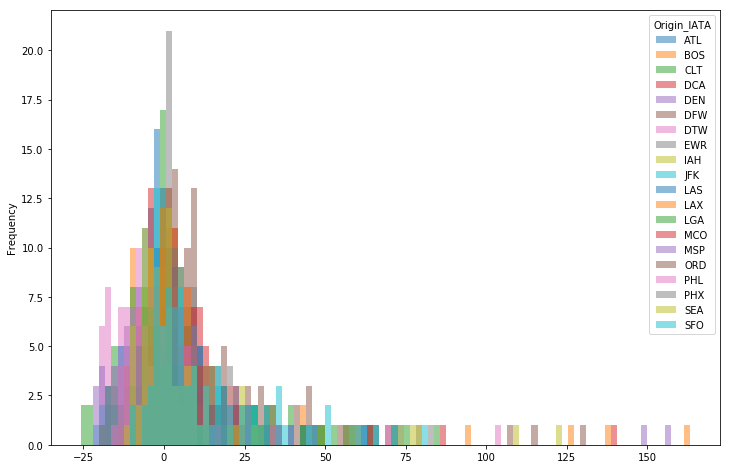

In [43]:
top_volume_airports_pivots.plot(kind='hist', bins=100, figsize=(12,8), alpha=0.5)

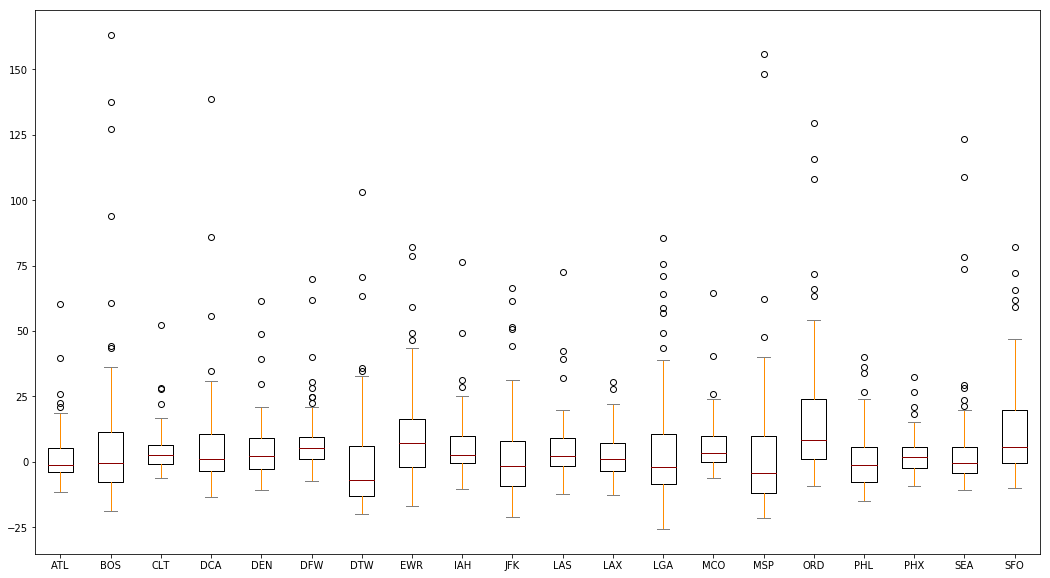

In [53]:
color = dict(boxes='Black', whiskers='DarkOrange', medians='DarkRed', caps='Gray')
top_volume_airports_pivots.plot(kind='box', color=color, figsize=(18,10))